# INF391 - Tarea 3

A continuación, se demuestra que single-link es capaz de detectar y agrupar los dos círculos concéntricos en clusters diferentes. ¿Es posible lograr esta agrupación utilizando BIRCH?. Si la respuesta es negativa, ¿qué característica del algoritmo lo impide?.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import cluster, datasets
from sklearn.cluster import Birch, AgglomerativeClustering

In [2]:
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05)
X, y = noisy_circles

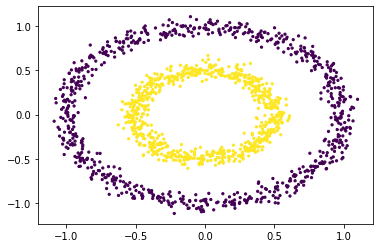

In [3]:
clustering = AgglomerativeClustering(linkage='single').fit(X)
plt.scatter(X[:, 0], X[:, 1], s=5, c=clustering.labels_)
plt.show()

# Análisis

Para desarrolladar un análisis más completo, vamos a considrar la combinación entre 4 valores para el _threshold_ , y otros 4 valores para el factor de _branching_ . Esto nos dará un total de 16 modelos utlizando _Birch_.

Una consideración importante es los valores para el _threshold_ deben estar en el intervalo $[0,1]$, dada la distribución de los datos en la figura anterior.

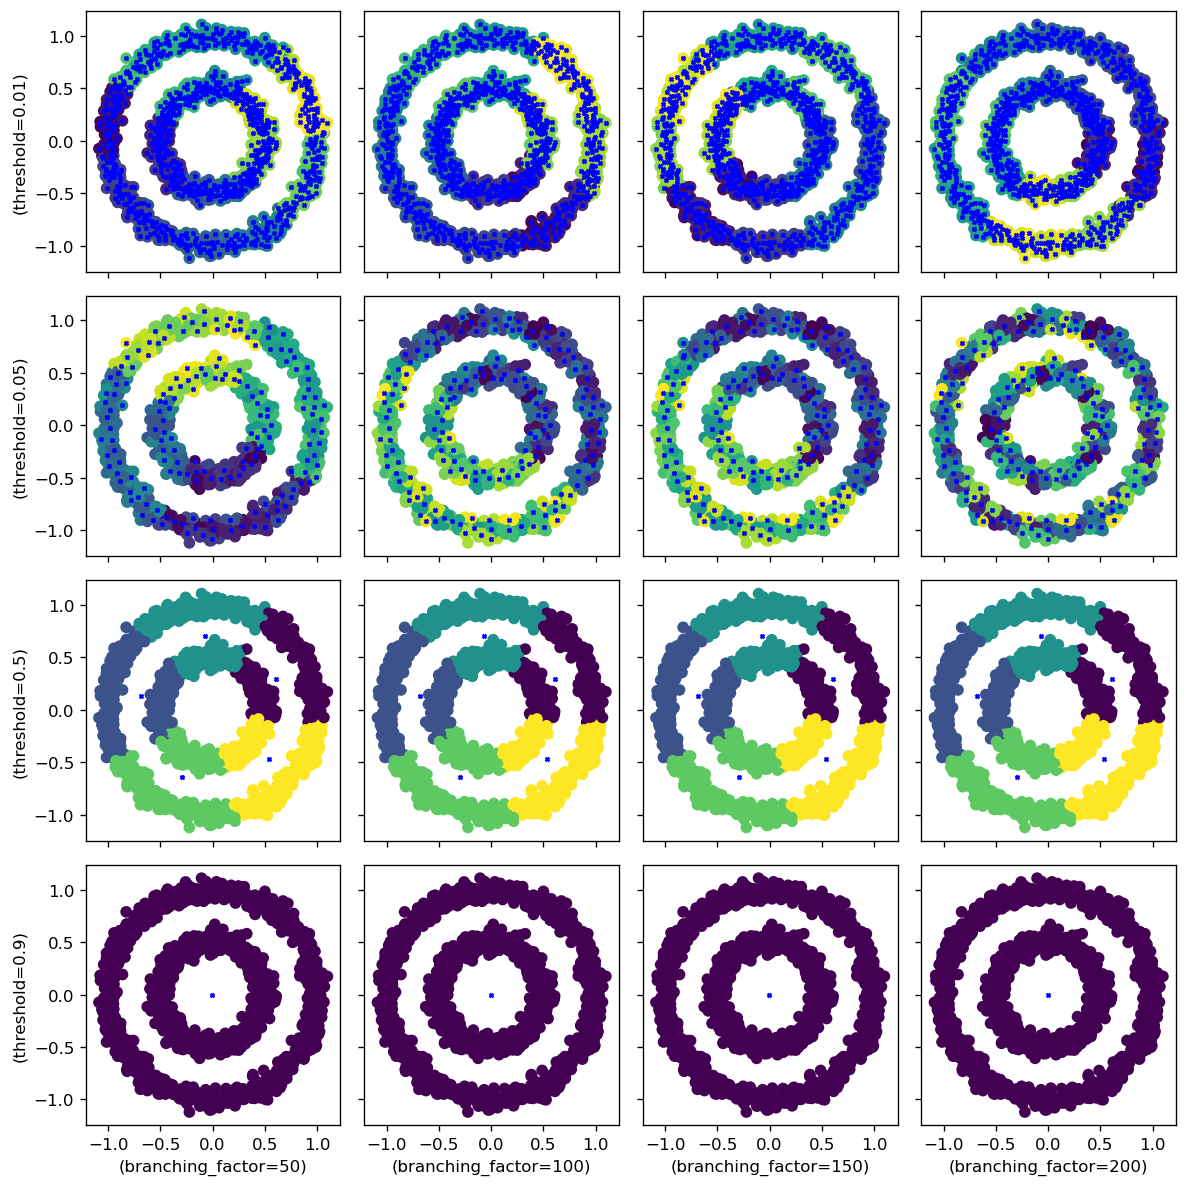

In [4]:
threshold_array = [0.01,0.05,0.5,0.9]
branching_factor_array = [50, 100, 150, 200]

fig, axs = plt.subplots(4,4, figsize=(10,10), dpi=120)

for i in enumerate(threshold_array):
    for j in enumerate(branching_factor_array):
        birch_aux = Birch(threshold=i[1],
                          branching_factor = j[1], 
                          n_clusters=None).fit(X)
        centroids = birch_aux.subcluster_centers_
        axs[i[0], j[0]].scatter(X[:,0], X[:,1], c=birch_aux.labels_)
        axs[i[0], j[0]].set(xlabel='(branching_factor=%s)'%j[1], ylabel='(threshold=%s)'%i[1])
        axs[i[0], j[0]].scatter(centroids[:, 0], centroids[:, 1],marker='x',s=5,color='b')
        
for ax in axs.flat:
    ax.label_outer()
    
plt.tight_layout()
plt.show()

> ¿Es posible lograr esta agrupación utilizando BIRCH?. Si la respuesta es negativa, ¿qué característica del algoritmo lo impide?.

La agrupación esperada corresponde a dos anillos concéntricos, donde cada uno corresponde a un cluster. De acuerdo a las 16 figuras anteriores, ninguna de estas se acerca a la agrupación esperada, independiente de la variación de sus _ _branching_factor_ y _threshold_ .

Como se mencionado anterior, los clusters dados por _AgglomerativeClustering_ son concéntricos, lo cual claramente no ocurre al aplicar _BIRCH_ dado que por definición, el _threshold_ se aplica localmente a cada CF tree, y esto a su vez nos indica que nunca existirá una superposición concéntrica de clusters, sino, no tendría sentido usar un árbol recubridor mínimo. Esto se puede verificar observando los puntos azules en los plots, los cuales corresponden a los centros.

Finalmente, un _threshold_ muy alto retorna un CF tree muy poco detallado. Este caso se ve reflejado claramente a medida que crece el _threshold_ en los modelos anteriores.